<a href="https://colab.research.google.com/github/ashutosh-linux/STML/blob/main/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
housing=pd.read_csv('/content/sample_data/california_housing_test.csv')
columns = ['latitude','total_rooms','housing_median_age','total_bedrooms']
data = housing[columns]
mle_params = {}
for column in columns:
    mean=np.mean(data[column])
    std_dev=np.std(data[column])
    mle_params[column]={'mean':mean,'std_dev':std_dev}

print ("Maximum Likelihood Parameter:")
print (mle_params )

Maximum Likelihood Parameter:
{'latitude': {'mean': 35.635389999999994, 'std_dev': 2.1293145488396026}, 'total_rooms': {'mean': 2599.578666666667, 'std_dev': 2155.2340361265233}, 'housing_median_age': {'mean': 28.845333333333333, 'std_dev': 12.553302814620363}, 'total_bedrooms': {'mean': 529.9506666666666, 'std_dev': 415.58508663436044}}


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
latitude = df['latitude']
latitude_mean = latitude.mean()
latitude_variance = latitude.var()

def log_likelihood(x,mean,variance):
  std_dev = np.sqrt(variance)
  return norm.logpdf(x,mean,std_dev)

values_to_test = [50,75,80]
log_likelihoods = {x: log_likelihood(x, latitude_mean, latitude_variance) for x in values_to_test}
print(log_likelihoods)

{50: -24.422383214813756, 75: -172.50228474173102, 80: -218.65450750813483}


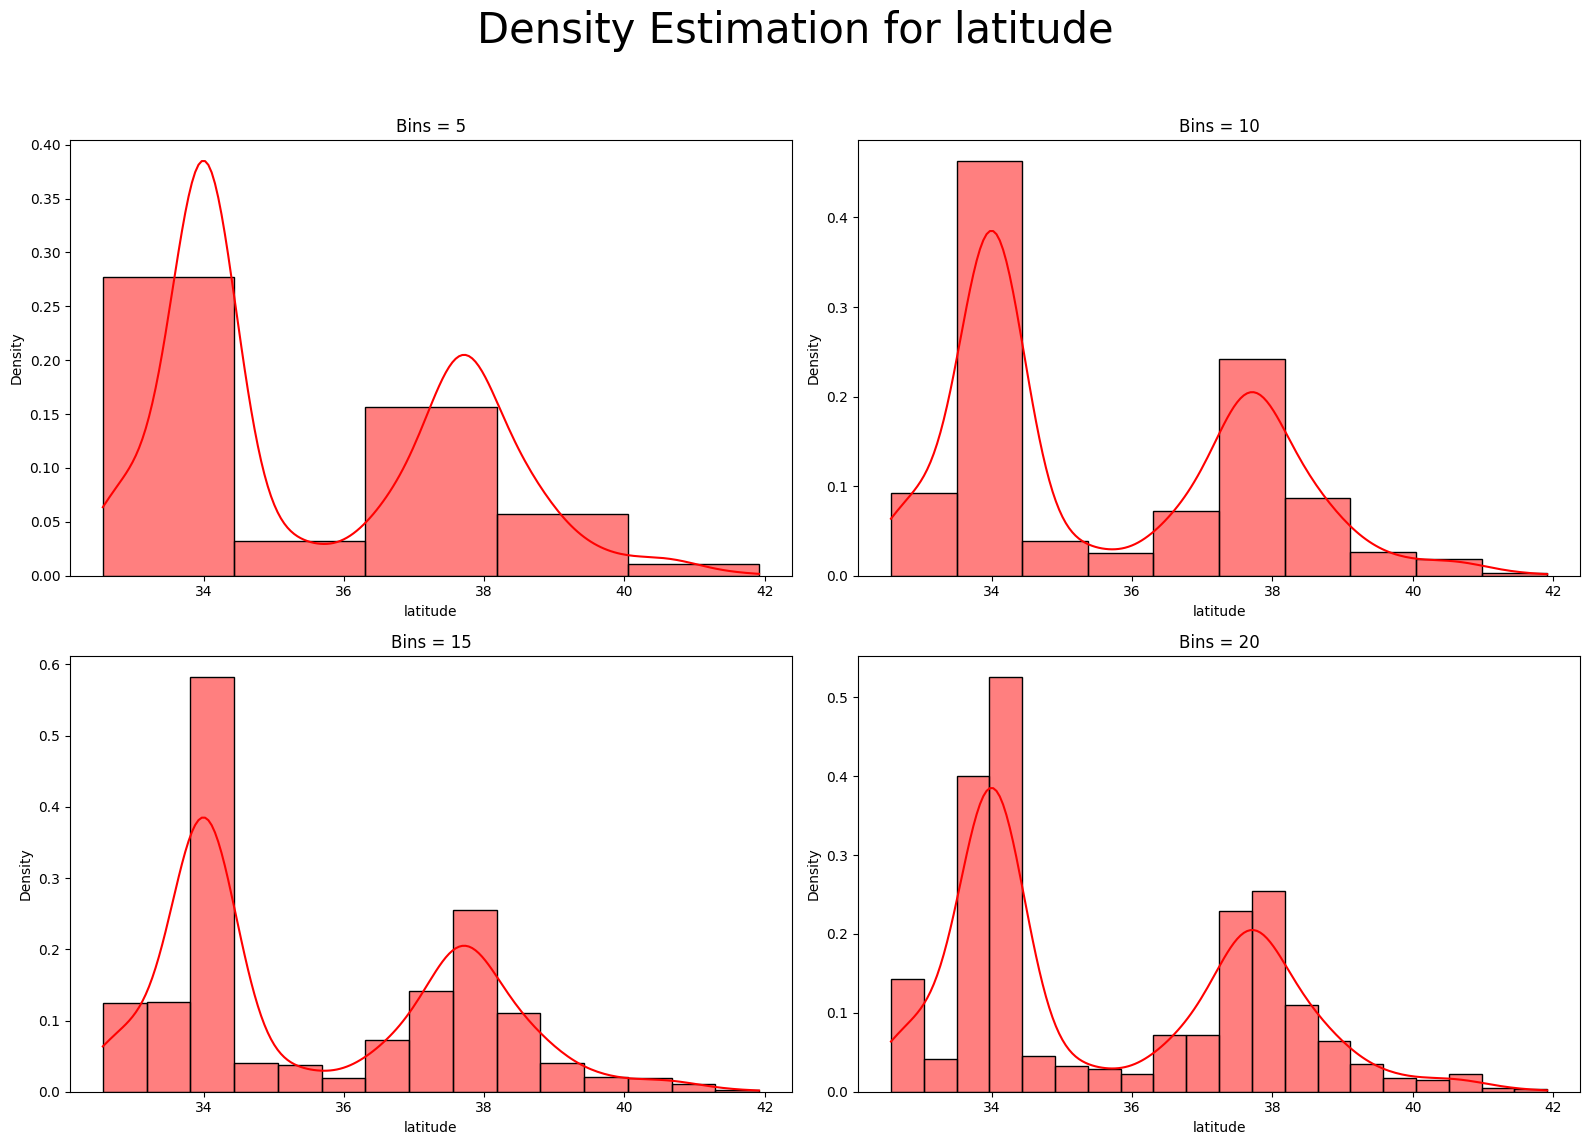

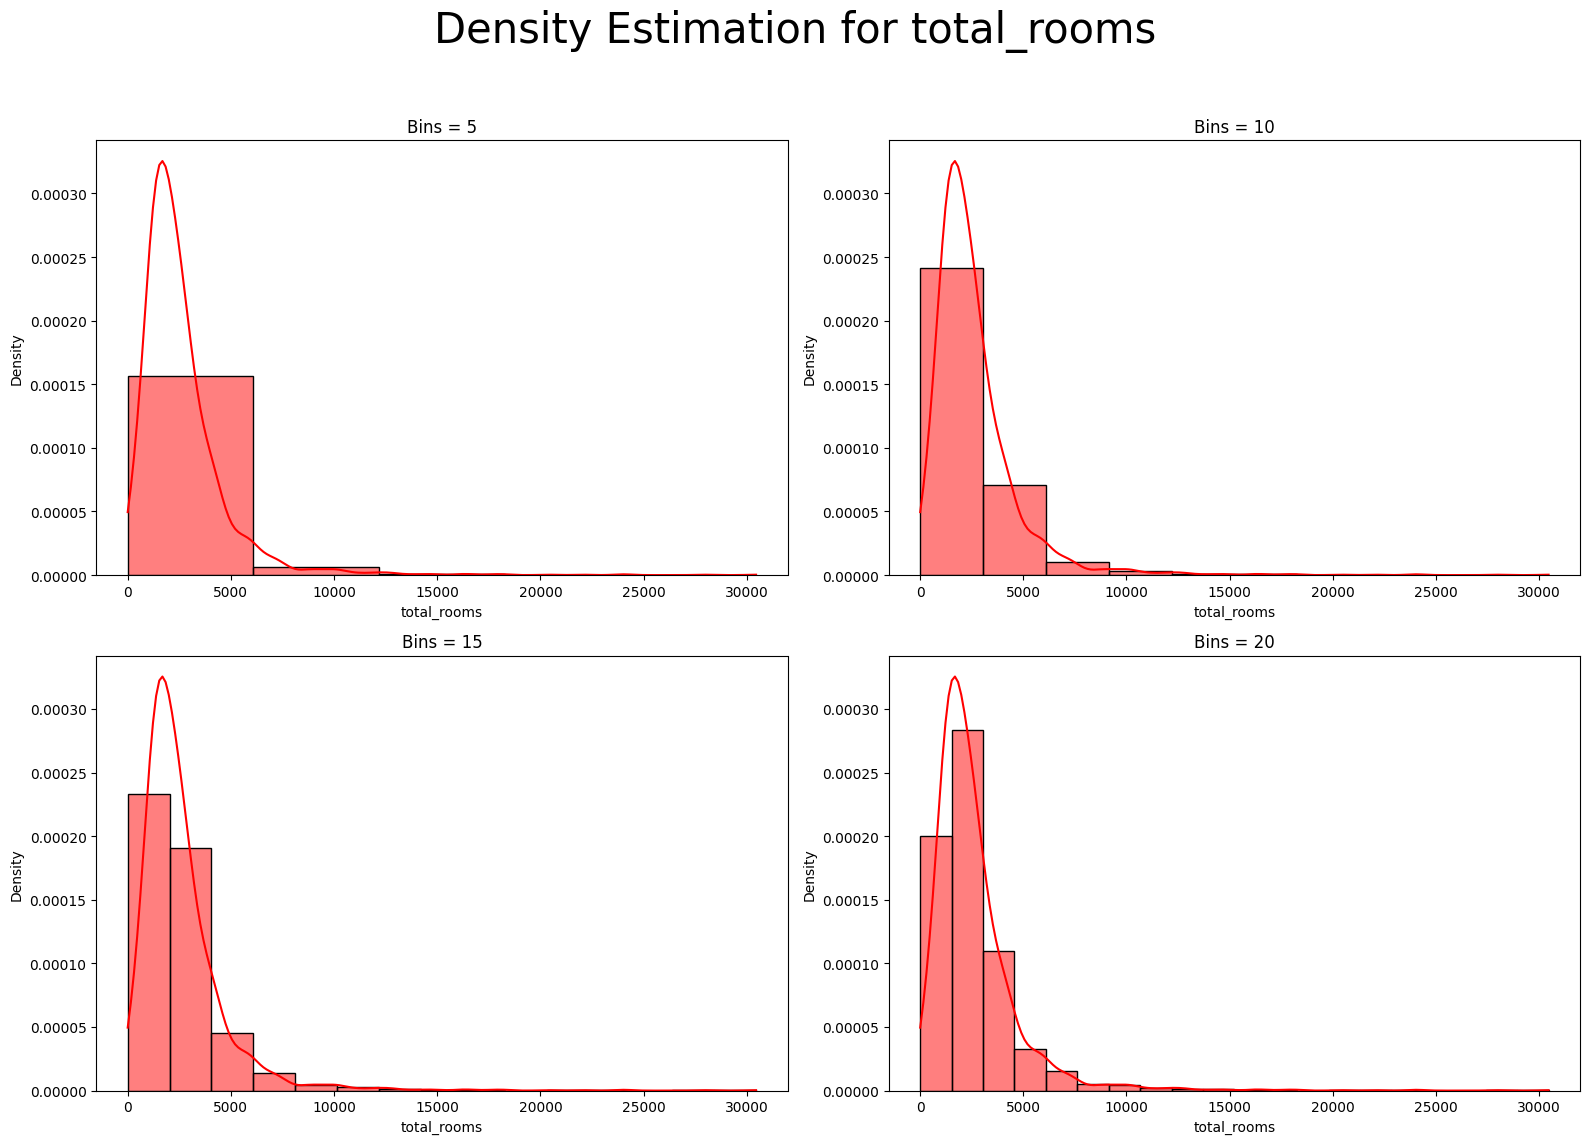

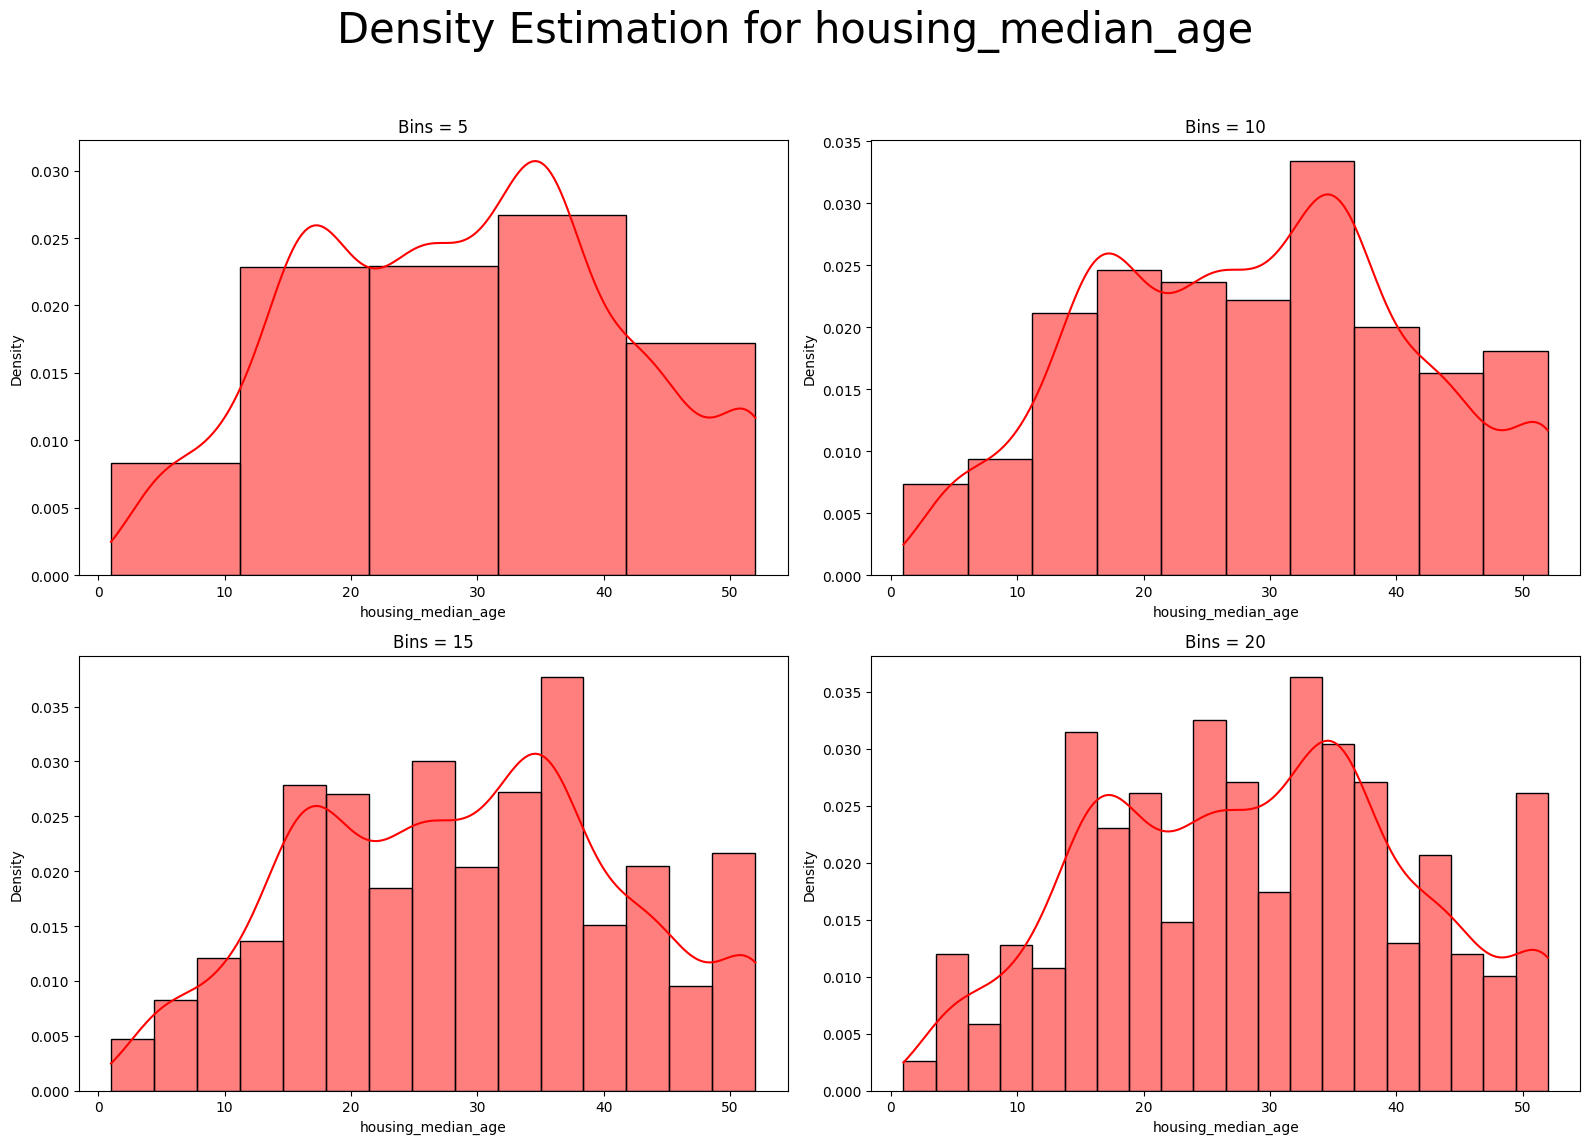

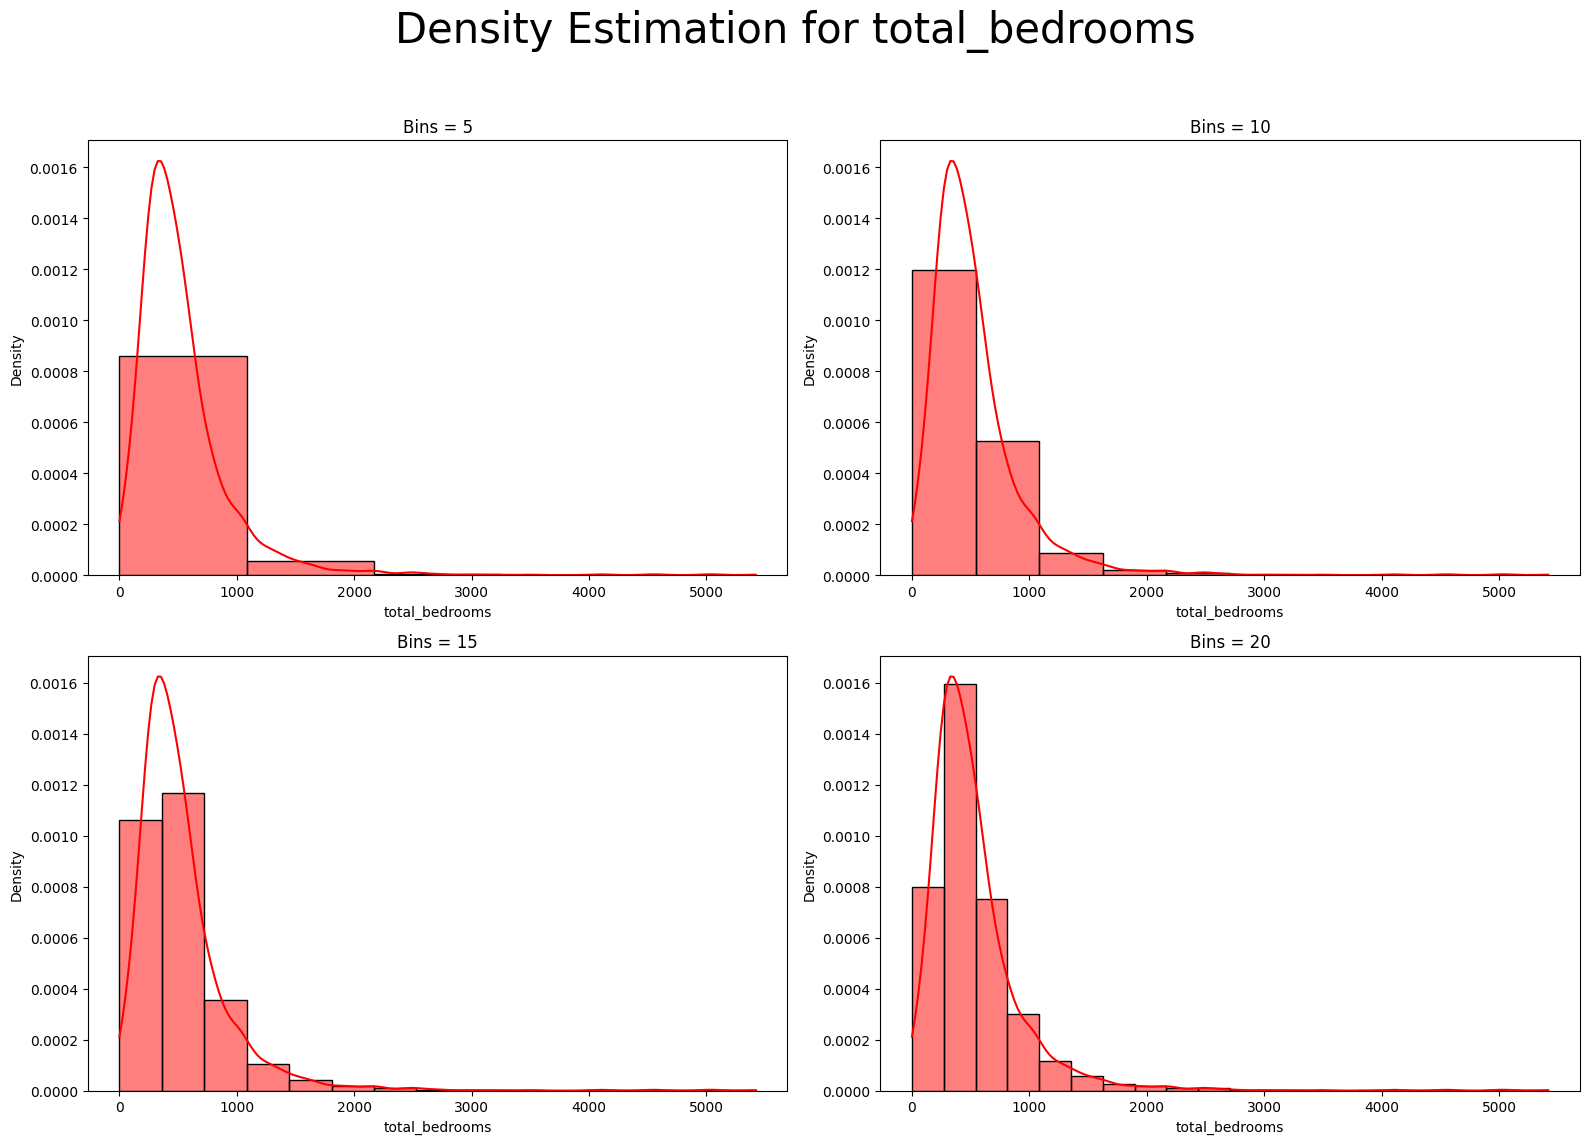

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/sample_data/california_housing_test.csv')
columns = ['latitude','total_rooms','housing_median_age','total_bedrooms']
bins = [5,10,15,20]
for column in columns:
  plt.figure(figsize=(16,12))
  plt.suptitle(f'Density Estimation for {column}',fontsize=30)
  for i,bin_size in enumerate(bins,1):
    plt.subplot(2,2,i)
    sns.histplot(df[column],bins=bin_size,kde=True,color='red',stat="density")
    plt.title(f'Bins = {bin_size}')
    plt.xlabel(column)
    plt.ylabel('Density')
  plt.tight_layout(rect=[0,0.03,1,0.95])
  plt.show()